# 无监督聚类算法实验报告

吴雅妃 2210515003；房美贤 2210515014

<a id='5'></a>
# 1. 数据预处理

In [2]:
# 导入包
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [5]:

# a. 数据清洗（这里wine数据集已经很干净，无需清洗）
# b. 缺失值处理
wine_data = pd.read_table('./wine.data',sep=',',header=None)
wine_data.info()
print("wine数据集没有缺失值,不需要进行缺失值的处理")

# c. 观察数据发现需要进行特征值的缩放处理
X = wine_data.iloc[:,1:]
y = wine_data.iloc[:,0]

X = X.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
wine数据集没有缺失值,不需要进行缺失值的处理


<a id='5'></a>
# 2. K-means 基于距离的聚类

**1. 选择合适的聚类数目**

观察发现红酒的种类有三种，初步认为合适的聚类数目是3。

In [8]:
len(set(y))

3

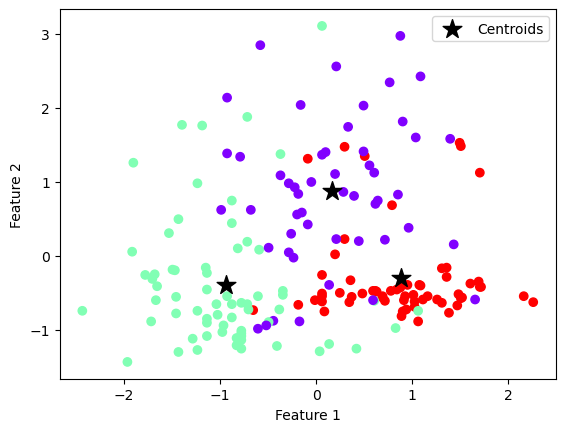

In [9]:
# 使用最佳的聚类数目，重新进行聚类，并展示结果
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 绘制聚类结果，以第一和第二个特征为例
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**2.尝试不同的聚类数目**

尝试的聚类数目从2到10，并且使用轮廓系数进行评估。 

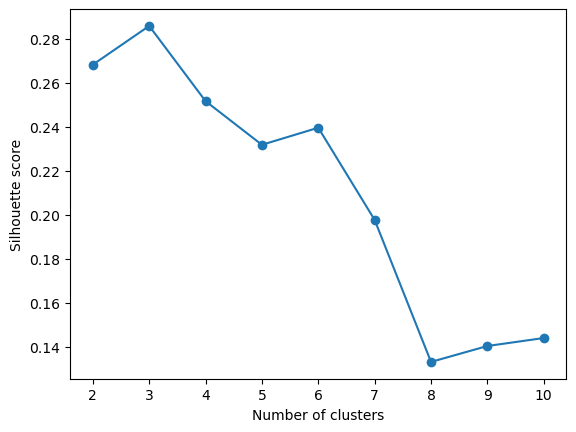

根据轮廓系数的最大值选择最佳的聚类数目为 3


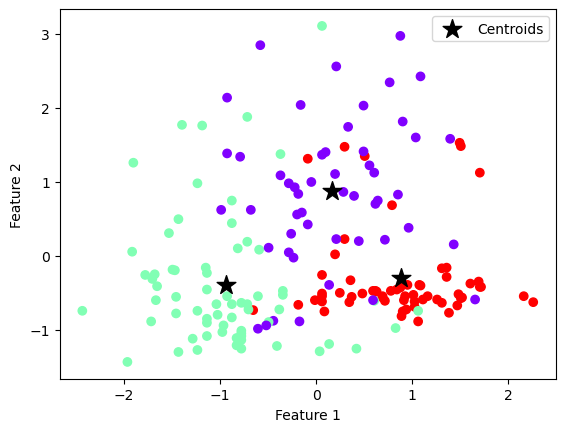

In [10]:
# 聚类数目从2到10
k_range = range(2, 11) 

# 评估指标: 轮廓系数
scores = [] 

for k in k_range:
    # 创建KMeans对象，并进行聚类
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    # 计算轮廓系数
    score = silhouette_score(X, labels)
    scores.append(score)

# 绘制聚类数目与轮廓系数的关系图
plt.plot(k_range, scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# 根据轮廓系数的最大值选择最佳的聚类数目
best_k = k_range[np.argmax(scores)]
print('根据轮廓系数的最大值选择最佳的聚类数目为', best_k)

# 使用最佳的聚类数目，重新进行聚类，并展示结果
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 绘制聚类结果，以第一和第二个特征为例
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


<a id='5'></a>

# 3、DBSCAN 基于密度的聚类

在DBSCAN聚类算法中，领域半径 eps 和成为核心对象的在领域半径内的最少点数 min_samples 是两个重要的超参数，它们决定了一个样本是核心点还是噪声点。不同的参数组合会导致不同的聚类结果，因此需要根据数据的特征和目标来选择合适的参数值。

**1. 使用k-distance图来确定eps的值**

eps值可以通过绘制k-diastance图来确定，即对每个样本，计算它与最近的k个邻居的平均距离，并按升序排列，然后观察图中的拐点knee。拐点可以作为eps的参考值，它表示了簇内和簇间距离的变化。

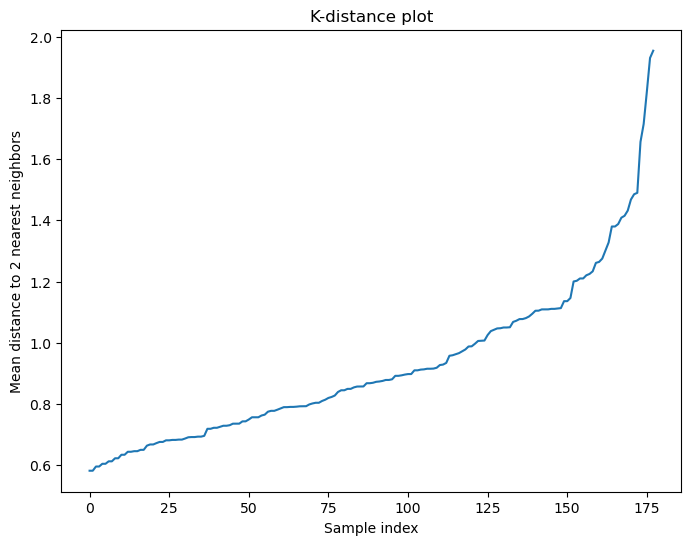

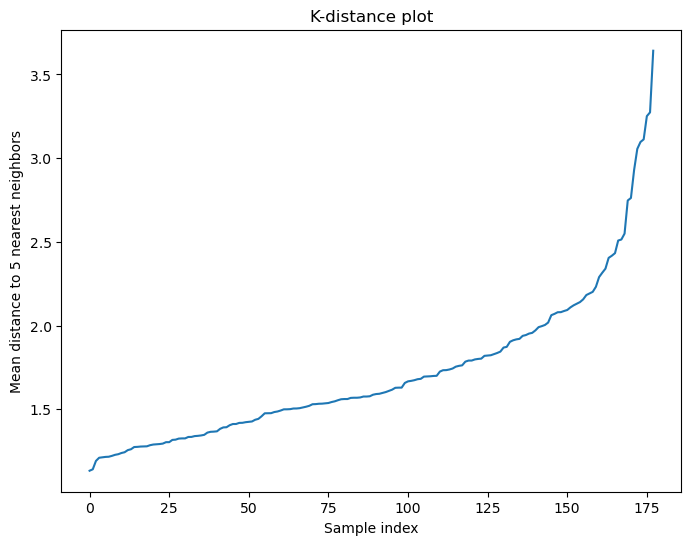

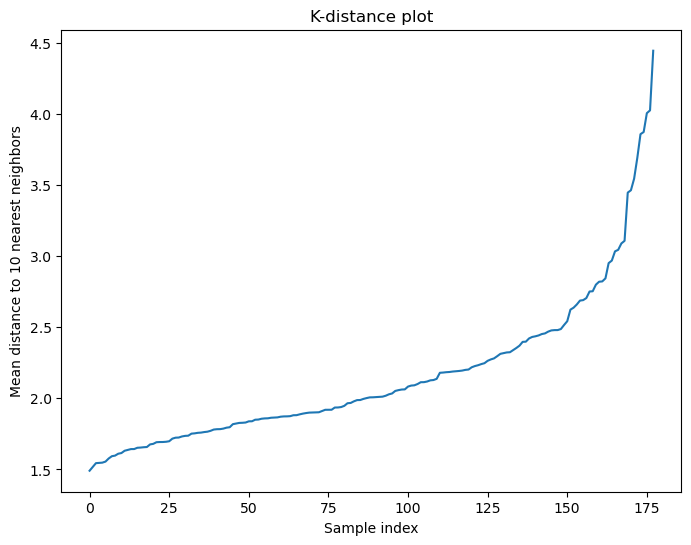

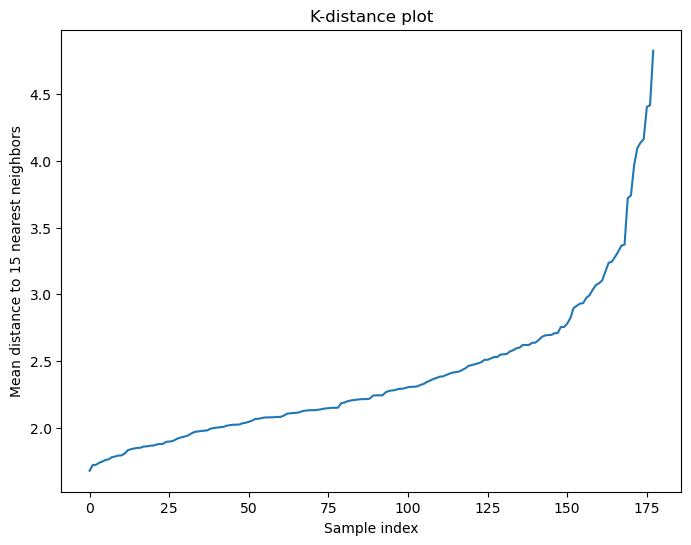

In [11]:
# k-distance
def k_distance_plot(X, k):
    # 使用欧式距离
    nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean')
    nbrs.fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # 计算每个样本与最近的k个邻居的平均距离
    mean_distances = np.mean(distances, axis=1)
    # 按升序排列平均距离
    sorted_distances = np.sort(mean_distances)  
    
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_distances)
    plt.xlabel('Sample index')
    plt.ylabel('Mean distance to %d nearest neighbors' % k)
    plt.title('K-distance plot')
    plt.show()

# 尝试不同的k值，并绘制k-距离图
# k=2
k_distance_plot(X, k=2)

# k=5
k_distance_plot(X, k=5)

# k=10
k_distance_plot(X, k=10)

# k=15
k_distance_plot(X, k=15)

由上图可得，eps参数在2.2, 2.3, 2.5, 2.7 3.1, 3.3 之间

**2. 模型选择**

选择不同的距离阈值和最小样本数，观察它们对聚类结果的影响，并使用紧密度和分离度作为评价指标。

下图只绘制分类为**1**种以上的结果。

In [21]:
# 定义一个函数，用于计算聚类结果的紧密度和分离度
def density_and_separation(X, labels):
    # 获取簇的个数和样本的个数
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_samples = len(X)

    # 初始化紧密度和分离度为0
    density = 0
    separation = 0

    # 遍历每个簇
    for k in range(n_clusters):
        # 获取当前簇的样本索引和样本个数
        cluster_mask = (labels == k)
        cluster_size = np.sum(cluster_mask)

        # 计算当前簇内的平均距离作为紧密度的一部分
        cluster_density = np.sum(np.linalg.norm(X[cluster_mask] - np.mean(X[cluster_mask], axis=0), axis=1)) / cluster_size
        density += cluster_density * cluster_size / n_samples
       
        if n_clusters!=1:
            cluster_separation = np.sum(np.linalg.norm(np.mean(X[cluster_mask], axis=0) - np.mean(X[~cluster_mask], axis=0))) / (n_clusters - 1)
            separation += cluster_separation * cluster_size / n_samples
    
    # 返回紧密度和分离度
    return density, separation

def dbscan_cluster(eps, min_samples):
    # 使用DBSCAN聚类算法对数据进行聚类
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit(X).labels_
    # Number of clusters in labels, ignoring noise if present.
     
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    n_noise_ = list(labels).count(-1)
    if n_clusters_ >1:
        # 获取核心点、边界点和噪声点的索引
        core_mask = np.zeros_like(labels, dtype=bool)
        core_mask[dbscan.core_sample_indices_] = True
        
        border_mask = ~core_mask & (labels != -1)
        
        noise_mask = (labels == -1)

        # 绘制聚类结果的散点图，不同的簇用不同的颜色表示，核心点用圆表示，边界点用三角形表示，噪声点用叉号表示
        plt.figure(figsize=(6, 6))
        
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # 噪声点用黑色表示
                col = [0, 0, 0, 1]
            class_member_mask = (labels == k)
        
            # 绘制核心点
            xy = X[class_member_mask & core_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=12, label='核心点')

            # 绘制边界点
            xy = X[class_member_mask & border_mask]
            plt.plot(xy[:, 0], xy[:, 1], '^', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6, label='边界点')

            # 绘制噪声
            xy = X[class_member_mask & noise_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'x', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6, label='噪声点')

        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.xlabel('Alcohol')
        plt.ylabel('Malic acid')
        plt.show()

        print("Estimated number of clusters: %d" % n_clusters_)
        print("Estimated number of noise points: %d" % n_noise_)     
    return X, labels, n_clusters_ 

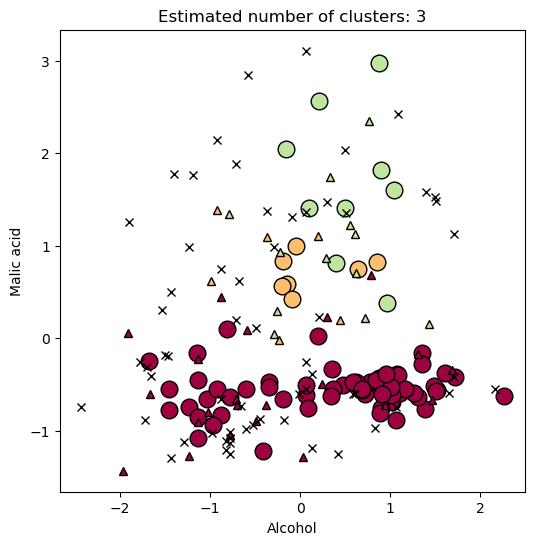

Estimated number of clusters: 3
Estimated number of noise points: 62
eps= 2.1 ,min_samples= 5
轮廓系数:  0.049
紧密度:  1.639
分离度:  0.926


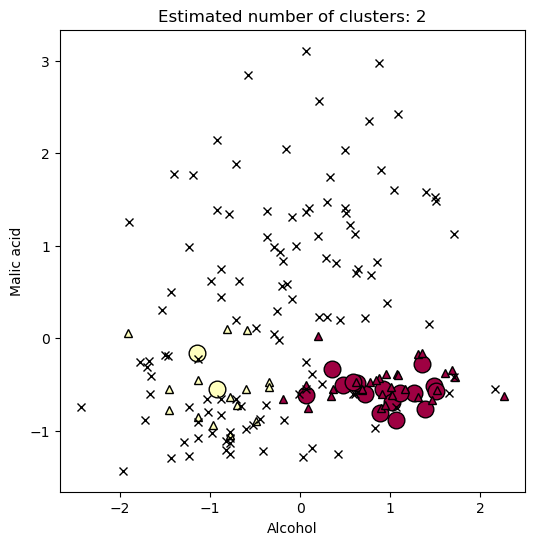

Estimated number of clusters: 2
Estimated number of noise points: 115
eps= 2.1 ,min_samples= 10
轮廓系数:  0.058
紧密度:  0.672
分离度:  1.138


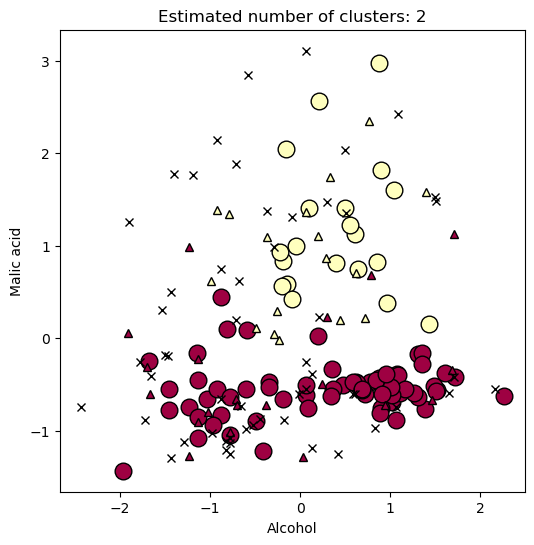

Estimated number of clusters: 2
Estimated number of noise points: 55
eps= 2.2 ,min_samples= 5
轮廓系数:  0.143
紧密度:  1.787
分离度:  2.072


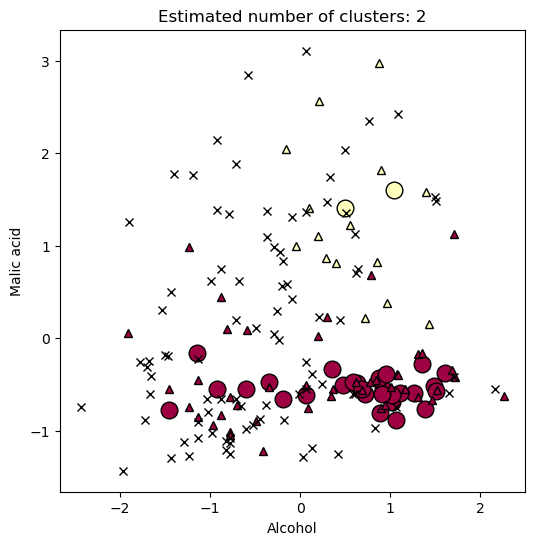

Estimated number of clusters: 2
Estimated number of noise points: 89
eps= 2.2 ,min_samples= 10
轮廓系数:  0.059
紧密度:  1.224
分离度:  1.440


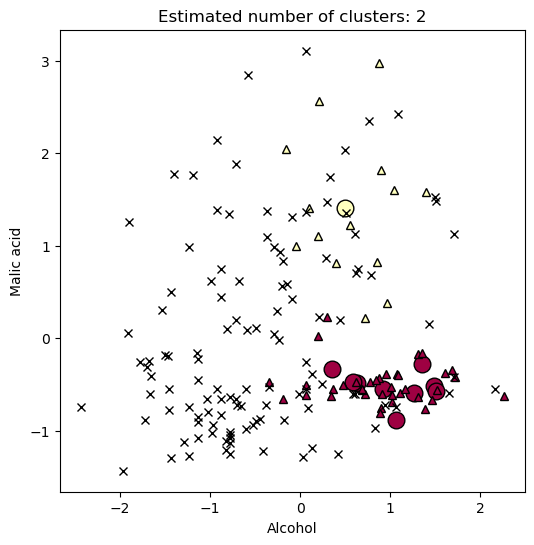

Estimated number of clusters: 2
Estimated number of noise points: 117
eps= 2.2 ,min_samples= 15
轮廓系数:  0.076
紧密度:  0.651
分离度:  1.207


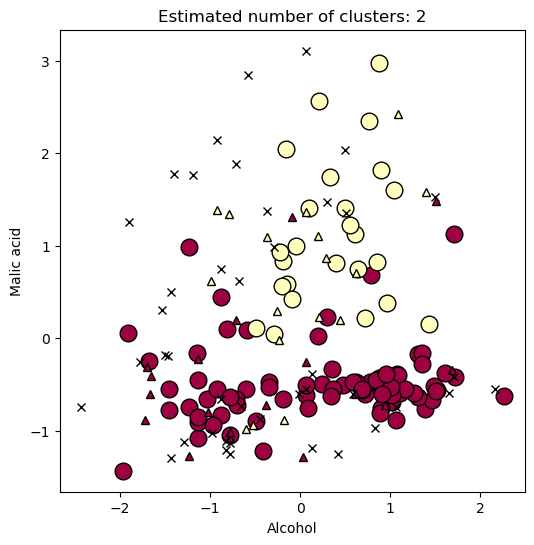

Estimated number of clusters: 2
Estimated number of noise points: 42
eps= 2.3 ,min_samples= 5
轮廓系数:  0.174
紧密度:  2.027
分离度:  2.391


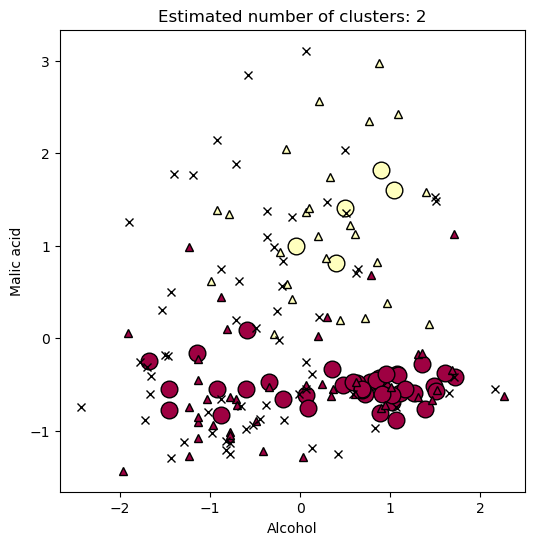

Estimated number of clusters: 2
Estimated number of noise points: 64
eps= 2.3 ,min_samples= 10
轮廓系数:  0.121
紧密度:  1.633
分离度:  1.916


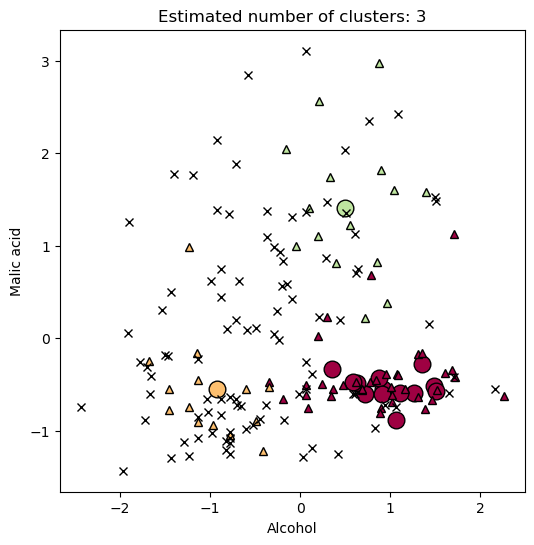

Estimated number of clusters: 3
Estimated number of noise points: 97
eps= 2.3 ,min_samples= 15
轮廓系数:  0.036
紧密度:  0.862
分离度:  0.772


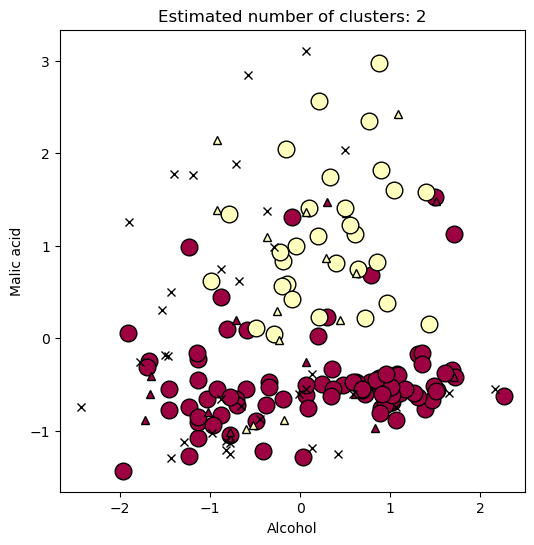

Estimated number of clusters: 2
Estimated number of noise points: 36
eps= 2.4 ,min_samples= 5
轮廓系数:  0.196
紧密度:  2.127
分离度:  2.589


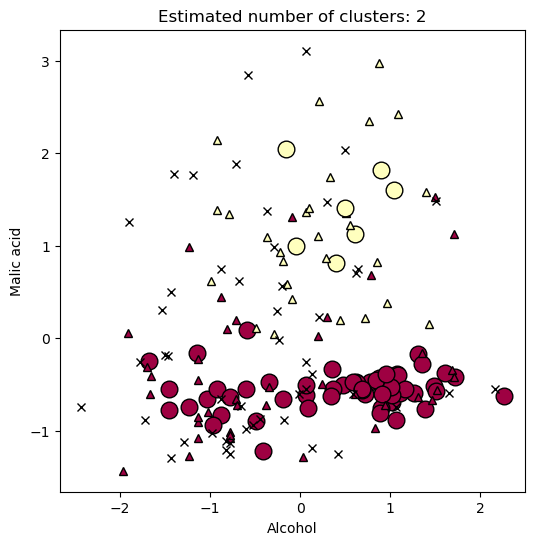

Estimated number of clusters: 2
Estimated number of noise points: 49
eps= 2.4 ,min_samples= 10
轮廓系数:  0.155
紧密度:  1.906
分离度:  2.239


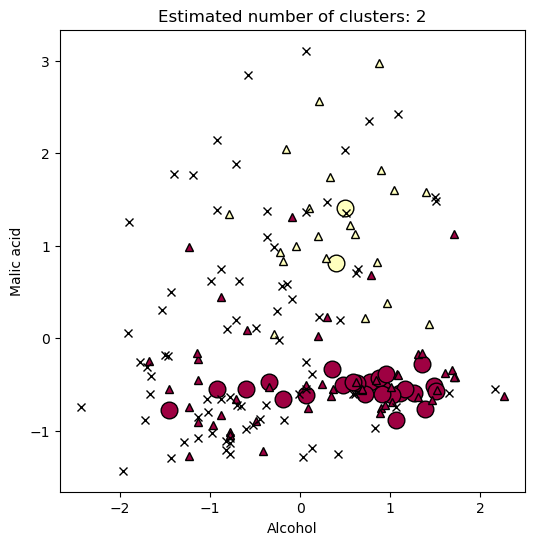

Estimated number of clusters: 2
Estimated number of noise points: 80
eps= 2.4 ,min_samples= 15
轮廓系数:  0.096
紧密度:  1.354
分离度:  1.691


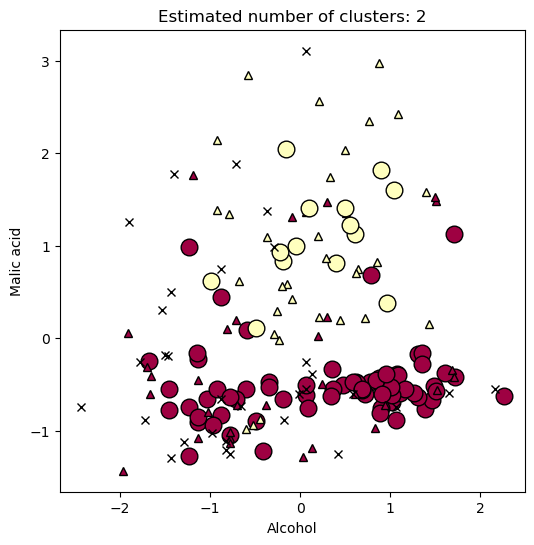

Estimated number of clusters: 2
Estimated number of noise points: 32
eps= 2.5 ,min_samples= 10
轮廓系数:  0.204
紧密度:  2.202
分离度:  2.694


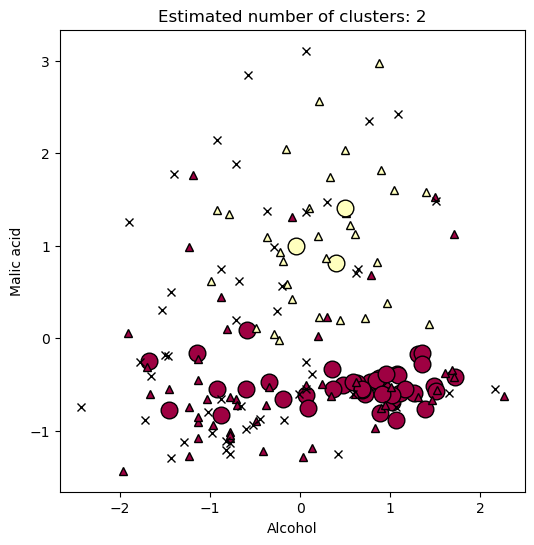

Estimated number of clusters: 2
Estimated number of noise points: 51
eps= 2.5 ,min_samples= 15
轮廓系数:  0.154
紧密度:  1.867
分离度:  2.225


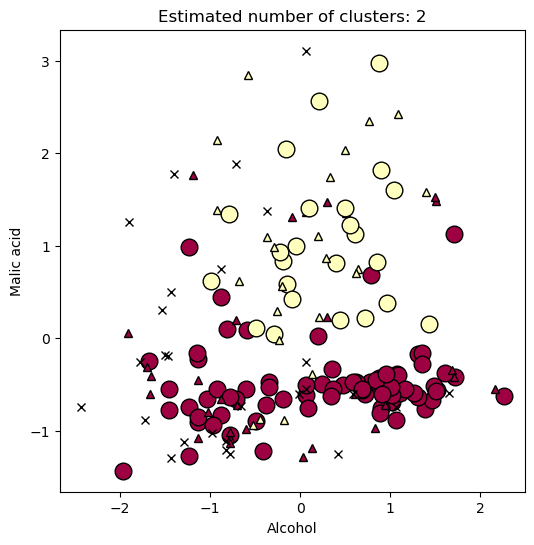

Estimated number of clusters: 2
Estimated number of noise points: 27
eps= 2.6 ,min_samples= 10
轮廓系数:  0.210
紧密度:  2.314
分离度:  2.803


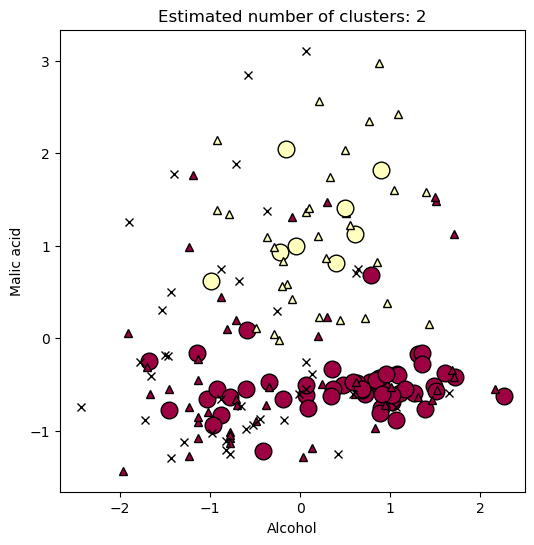

Estimated number of clusters: 2
Estimated number of noise points: 39
eps= 2.6 ,min_samples= 15
轮廓系数:  0.190
紧密度:  2.077
分离度:  2.573


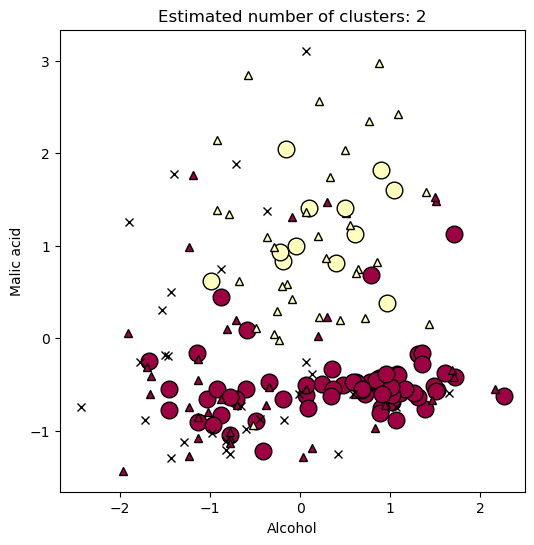

Estimated number of clusters: 2
Estimated number of noise points: 30
eps= 2.7 ,min_samples= 15
轮廓系数:  0.216
紧密度:  2.238
分离度:  2.840


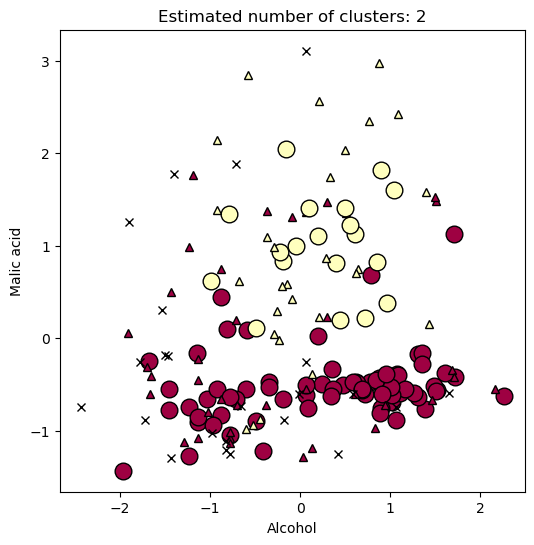

Estimated number of clusters: 2
Estimated number of noise points: 23
eps= 2.8 ,min_samples= 15
轮廓系数:  0.229
紧密度:  2.379
分离度:  3.018


In [22]:
# 定义两个列表，分别存储不同的eps和min_samples值
eps_list = [2.1,2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3,3.4,3.5,3.6]
min_samples_list = [5,10,15]


# 使用嵌套循环来遍历不同的参数组合
for eps in eps_list:
    for min_samples in min_samples_list:
        # 调用dbscan_cluster函数，并获取返回的轮廓系数
        X, labels ,n_clusters_= dbscan_cluster(eps, min_samples)
        # 使用轮廓系数对聚类结果进行评估，轮廓系数越接近1表示聚类效果越好，越接近-1表示聚类效果越差
        if n_clusters_ >1:    
        
            score = silhouette_score(X, labels)
            print("eps=",eps,",min_samples=",min_samples)
            print('轮廓系数: ','%.3f' % score)
            # 使用紧密度和分离度对聚类结果进行评估，紧密度越小表示簇内距离越小，分离度越大表示簇间距离越大
            density, separation= density_and_separation(X, labels)
            print('紧密度: ','%.3f' % density)
            print('分离度: ','%.3f' % separation)

**3. 结果**

结合紧密度和分离度以及输出的图进行评估，聚类结果最好的参数组合应是 **eps= 2.8 , min_samples= 15**，此时轮廓系数为**0.229**，紧密度为**2.379**，分离度为**3.018**

<a id='5'></a>
# 4、层次聚类

**凝聚型层次聚类**

Agglomerative Clutsering 是一种自底而上的层次聚类方法，使用根据指定的欧氏距离计算出类之间的进行聚类。并根据之前的聚类结果，将簇的数量预设为**3**。

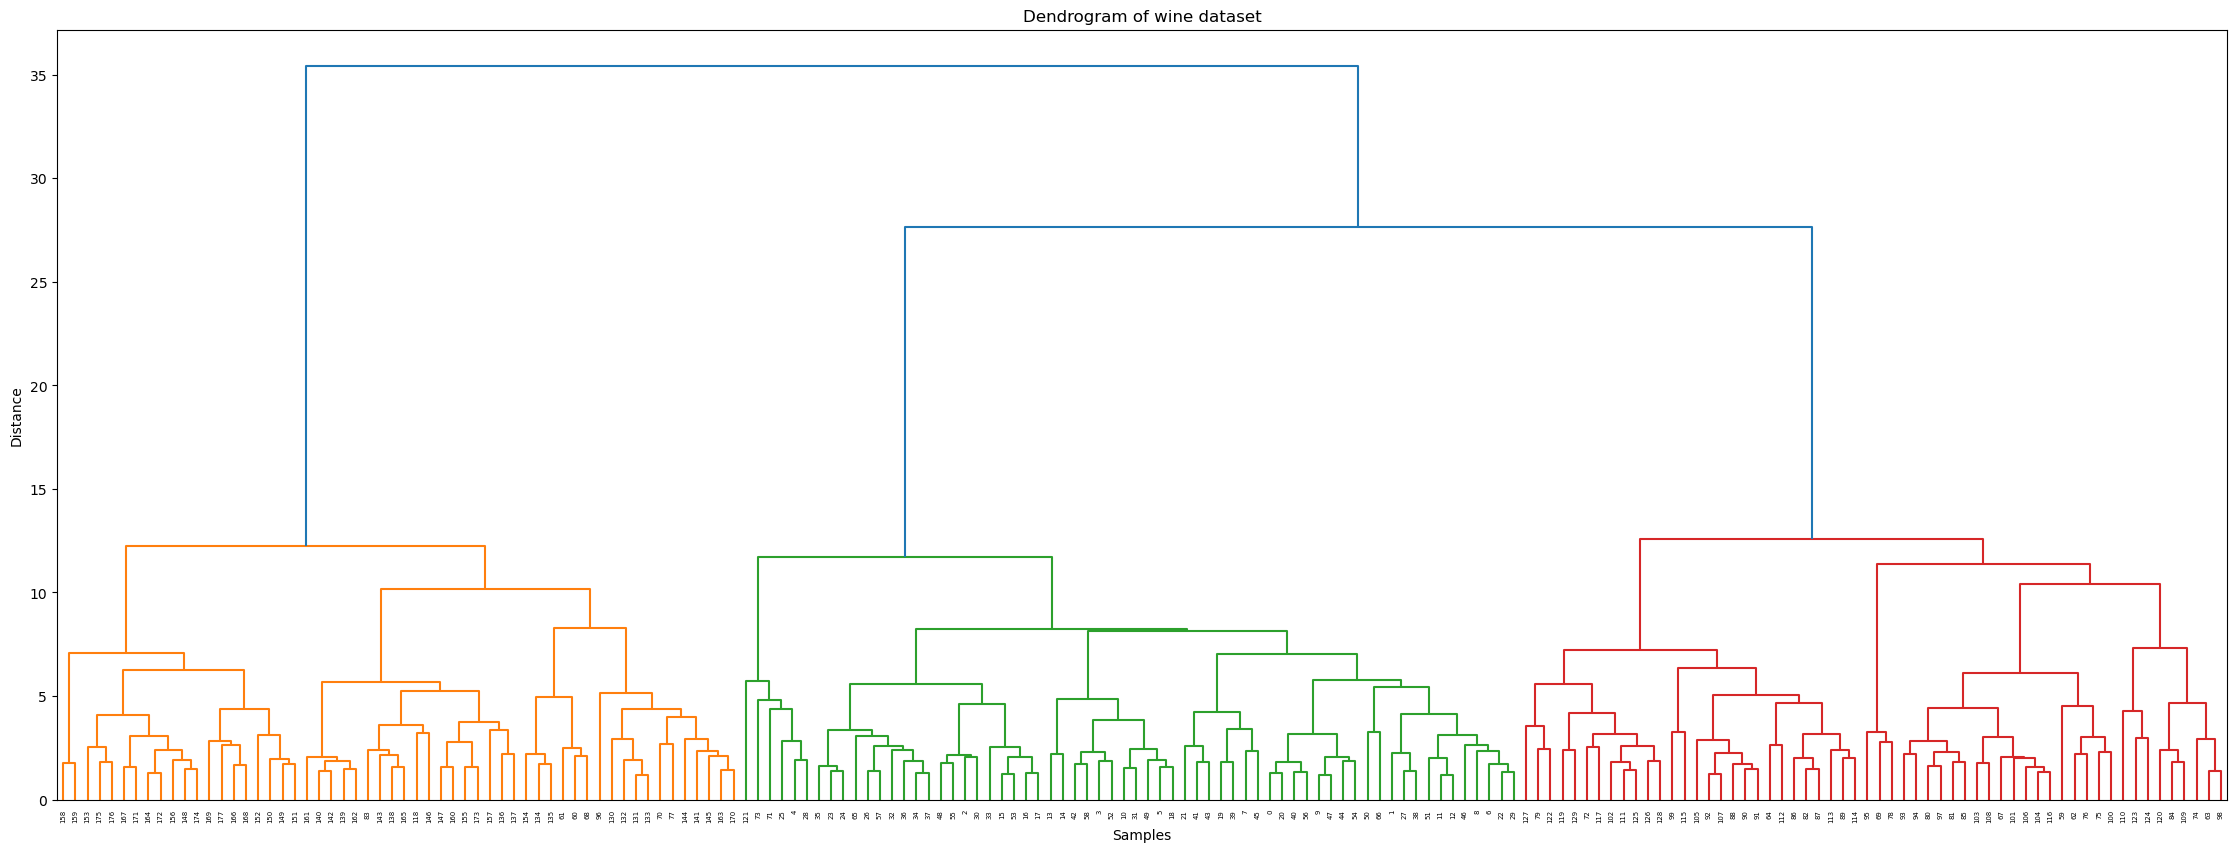

In [26]:
# 导入所需的库
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 凝聚型层次聚类模型，使用欧氏距离和ward连接方式，并且根据之前的聚类结果，将簇的数量预设为3
agg = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
# 对数据进行聚类，得到标签
hier_labels = agg.fit_predict(X)
Z=linkage(X,method="ward")
# 绘制树状图和热图，展示聚类结果
plt.figure(figsize=(28, 10))
dendrogram(Z)
plt.title("Dendrogram of wine dataset")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


<a id='5'></a>
# 5、模型评估与比较

**1.评估指标**

使用轮廓系数和兰德系数作为三种聚类模型性能的评估指标。

(1) 轮廓系数（silhouette score）是一种评估聚类结果的指标，它考虑了每个样本与其所属簇内其他样本的平均距离（a）和与最近的其他簇的平均距离（b），并计算出(b-a)/max(a,b)的平均值。轮廓系数的取值范围是[-1,1]，越接近1表示聚类效果越好，越接近-1表示聚类效果越差，接近0表示簇有重叠。

(2) 兰德系数（rand score）是一种衡量两个数据聚类相似度的指标，它考虑了所有样本对，并统计在预测聚类和真实聚类中同属于一个簇或不同簇的样本对的比例。Rand指数的取值范围是[0,1]，越接近1表示聚类效果越好，越接近0表示聚类效果越差。

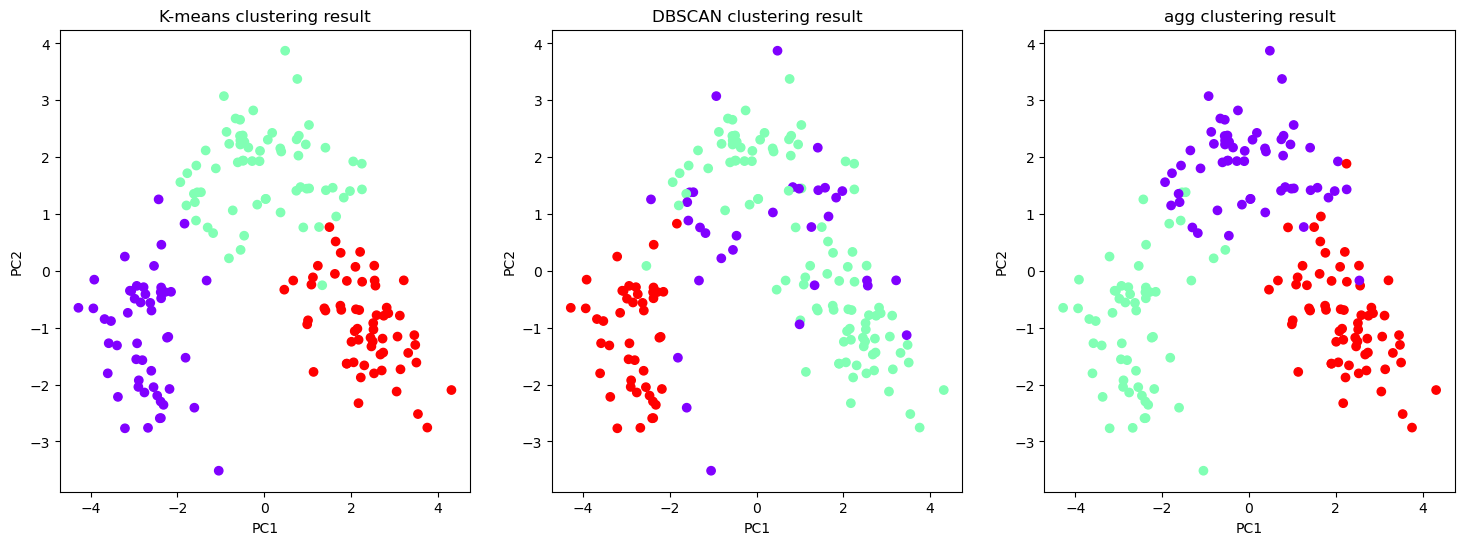

In [49]:
# 导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
# 使用K-means聚类算法，设置簇的个数为2，生成聚类簇
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# 使用DBSCAN聚类算法，设置邻域半径为2.5，最小样本数为10，生成聚类簇
dbscan = DBSCAN(eps=2.5, min_samples=10)
dbscan.fit(X)
dbscan_labels = dbscan.labels_

# 凝聚型层次聚类模型，使用欧氏距离和ward连接方式
agg = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
# 对数据进行聚类，得到标签
hier_labels = agg.fit_predict(X)

# 绘制三种聚类方法的结果的可视化图表，比较不同方法之间的差异和特点
plt.figure(figsize=(18, 6))
plt.subplot(131)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap="rainbow")
plt.title("K-means clustering result")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.subplot(132)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap="rainbow")
plt.title("DBSCAN clustering result")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.subplot(133)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels, cmap="rainbow")
plt.title("agg clustering result")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



K-means: silhouette score = 0.28594199657074876 , rand score = 0.9148795960669529
DBSCAN: silhouette score = 0.20438854495188732 , rand score = 0.42354907037688627
Hierarchical: silhouette score = 0.2774439826952265 , rand score = 0.7899332213582837


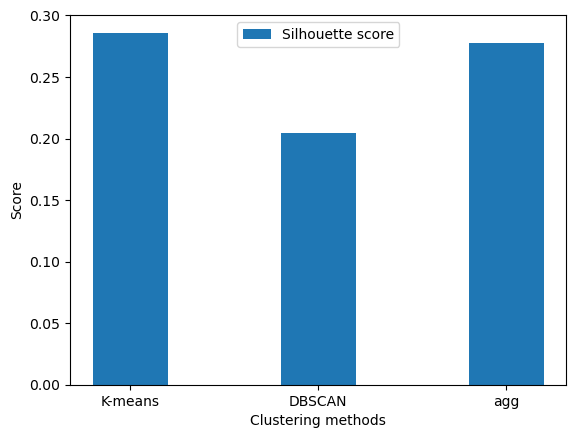

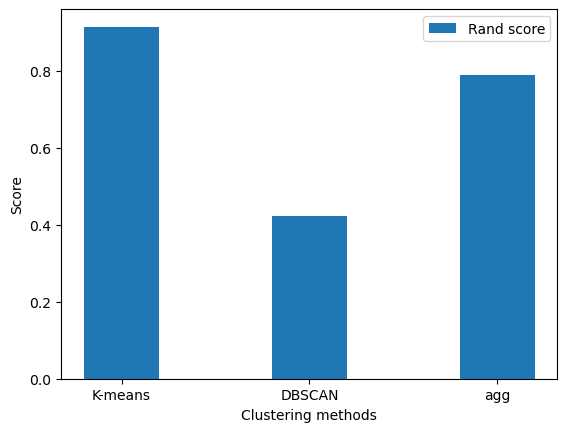

In [50]:

# 使用轮廓系数和兰德系数对三种聚类方法的结果进行评估
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_rand = adjusted_rand_score(y, kmeans_labels)
dbscan_silhouette = silhouette_score(X, dbscan_labels)
dbscan_rand = adjusted_rand_score(y, dbscan_labels)
hier_silhouette = silhouette_score(X, hier_labels)
hier_rand = adjusted_rand_score(y, hier_labels)
# 打印评估指标的结果
print("K-means: silhouette score =", kmeans_silhouette, ", rand score =", kmeans_rand)
print("DBSCAN: silhouette score =", dbscan_silhouette, ", rand score =", dbscan_rand)
print("Hierarchical: silhouette score =", hier_silhouette, ", rand score =", hier_rand)
#计算三种聚类方法的轮廓系数和Rand指数
sil_scores = [] # 存储轮廓系数
rand_scores = [] # 存储Rand指数

sil_scores.append(silhouette_score(X, kmeans_labels)) # 计算k-means聚类的轮廓系数
rand_scores.append(adjusted_rand_score(y, kmeans_labels)) # 计算k-means聚类的Rand指数
sil_scores.append(silhouette_score(X, dbscan_labels)) # 计算DBSCAN聚类的轮廓系数
rand_scores.append(adjusted_rand_score(y, dbscan_labels)) # 计算DBSCAN聚类的Rand指数
sil_scores.append(silhouette_score(X, hier_labels)) # 计算层次聚类的轮廓系数
rand_scores.append(adjusted_rand_score(y, hier_labels)) # 计算层次聚类的Rand指数


# 绘制三种聚类方法的轮廓系数和Rand指数结果的可视化图表
methods = ['K-means', 'DBSCAN',"agg"] # 聚类方法名称
plt.bar(methods, sil_scores, width=0.4, label='Silhouette score')
plt.xlabel('Clustering methods')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.bar(methods, rand_scores, width=0.4, label='Rand score')
plt.xlabel('Clustering methods')
plt.ylabel('Score')
plt.legend()
plt.show()

**2. 结果**

对比以上三种聚类结果以及指标，可见k-means聚类在本实验中表现最好。

<a id='5'></a>
# 6、总结

进一步讨论每种方法的优缺点、适用场景以及改进方法。

##### **1. k-means聚类**
**优点**
1. 实现简单，理解容易，只需要指定簇数k和距离度量。
2. 计算效率高，可以处理大规模的数据集，可以并行化或分布式。
3. 灵活适应，可以与其他方法或技术结合处理不同类型的数据和距离度量。
4. 稳健鲁棒，可以处理异常值和噪声，产生一致的结果。

**缺点**
1. 传统的k均值（k-means）算法对于初始聚类中心的选择是随机的，或者是由用户主观指定的。k均值（k-means）算法对初始聚类中心的依赖性很强，不同的k值可能导致不同的结果，不够好的初始值可能造成收敛速度很慢或者聚类失败。
2. 依赖于初始质心的选择，不同的随机种子可能导致收敛到不同的局部最优而非全局最优。
3. 无法很好地解决数据簇分布差别比较大的情况。K均值算法本质上假设了各个数据簇的数据具有一样的先验概率，并呈现球形或者高维球形分布，不适合处理复杂或不规则的簇。
4. 对数据的尺度和分布敏感，需要进行标准化或归一化处理。

**适用场景**
1. 数据量较大，特征维度较低，簇形状较为规则且大小相似。
2. 数据分布较为均匀，没有明显的异常值或噪声。
3. 对聚类结果的精度要求不太高，可以接受一定程度的误差。

**改进方法**
1. 使用轮廓系数、肘部法则、信息准则等方法来选择合适的k值。
2. 对初始聚类中心的选择进行优化。使用k-means++、k-meansⅡ等算法来选择初始质心，提高收敛速度和质量。其主要思想是：选择批次距离尽可能远的K个点。
3. 使用核函数、谱聚类等方法来处理非线性可分或非球形的簇，因为k-means只能获取球状簇的根本原因在于距离度量的方式，可以通过改进距离度量的方式来解决。
4. 使用PCA等方法来降低数据维度，减少计算复杂度和噪声干扰。对于离群点和孤立点敏感，可通过去除离群点后再聚类，减少离群点和孤立点对于聚类效果的影响。

##### **2. DBSCAN聚类**
DBSCAN是基于密度的聚类算法，它假设聚类结构能够通过样本分布的紧密程度确定，算法从样本密度的角度考察样本之间的可连接性，并基于可连接样本不断扩展聚类簇，以获得最终结果。DBSCAN不需要预先指定簇的个数，也不假设簇的形状是球形的，因此可以处理任意形状的数据集。DBSCAN的主要参数是eps（邻域半径）和min_samples（邻域内最小数据点数），它们决定了一个点是否是核心点、边界点或噪声点。

**优点**
1. 能够识别和排除噪声点
2. 对异常值不敏感
3. 聚类结果没有偏倚

**缺点**
1. 运行速度较慢
2. 难以在不同密度的数据中识别簇
3. 对高维数据效果不佳
4. 对参数选择敏感

**适用场景**
1. 适用于数据集中有明显的密度差异，且簇的形状不规则，需要排除噪声点的情况。例如，在空间数据分析、图像分割、异常检测等领域有广泛的应用

**改进方法**
1. OPTICS（基于排序点的图像系统聚类）可以解决不同密度区域的聚类问题
2. DENCLUE（基于密度分布函数的聚类）可以解决高维数据和噪声敏感问题
3. ST-DBSCAN（基于空间和时间邻域扩展性密度聚类）可以解决时空数据的聚类问题。

##### **3. 层次聚类**
层次聚类是基于距离或相似度的聚类算法，它将数据点按照层次结构进行聚合或分割，形成一棵树状图（dendrogram）。假设聚类结构能够通过样本分布的紧密程度确定，算法从样本密度的角度考察样本之间的可连接性，并基于可连接样本不断扩展聚类簇，以获得最终结果。层次聚类有两种主要方法：凝聚法（自下而上）和分裂法（自上而下）。凝聚法是从每个数据点作为一个簇开始，然后逐渐合并最近的簇，直到达到预定的簇数或停止条件。分裂法是从所有数据点作为一个簇开始，然后逐渐划分最远的簇，直到达到预定的簇数或停止条件。

**优点**

1. 不需要预先指定簇的个数
2. 可以通过树状图直观地展示数据的层次结构
3. 可以选择不同的距离或相似度度量和合并或划分准则

**缺点**
1. 运行速度较慢
2. 占用内存较多
3. 一旦合并或划分后不能进行调整

**适用场景**
1. 数据集中有明显的层次结构，且需要根据不同的距离或相似度度量和合并或划分准则进行灵活的聚类的情况。例如，在生物信息学、社会网络分析、文本挖掘等领域有广泛的应用

**改进方法**
1. BIRCH（平衡迭代规约和聚类）可以解决大规模数据集的聚类问题
2. CURE（代表点聚类）可以解决非球形簇和噪声敏感问题
3. ROCK（基于链接的聚类）可以解决离散属性数据的聚类问题。